<a href="https://colab.research.google.com/github/mannmoshe/deep-learning/blob/main/Solutions/rnn_mm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

***All the cells that start with "MM" written or edited by Moshe Mann.***

MM: the next script and data based on the RNN example from https://www.udemy.com/course/deeplearning/ course.

MM: In this notebook we will try to predict Google stock's open price.<br>

> Train data contains the stock's price from 2012 to 2016;<br>
> Test data contains the stock's price at January 2017.

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
#MM:
print(type(dataset_train))
dataset_train.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#MM:
print(type(training_set))
training_set[:5]

<class 'numpy.ndarray'>


array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

### Feature Scaling

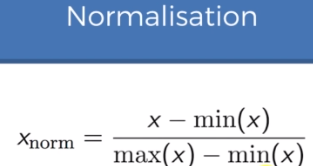

In [5]:
from sklearn.preprocessing import MinMaxScaler
#MM: applying normalisation
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
#MM:
training_set_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

### Creating a data structure with 60 timesteps and 1 output

In [7]:
#MM:
len(training_set_scaled)

1258

MM:<br> 
Since there is 20 trading days per month, we will look at the 3 previous month - 60 days.<br>
Less than 60 will lead to underfitting.

In [8]:
X_train = [] #MM: X_train is the input
y_train = [] #MM: y_train is the output
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0]) #MM: the input is the last 60 trading days stock's price. 
    y_train.append(training_set_scaled[i, 0]) #MM: the output is the 61 trading day stock's price. 
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
#MM:
print(X_train[0], y_train[0])

[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656] 0.08627874097775134


### Reshaping

MM:<br>
Reshaping in order to enable use more dimensions except of open stock's price.


In [10]:
#MM:
X_train.shape

(1198, 60)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
#MM:
X_train.shape

(1198, 60, 1)

MM:<br>
In this notebook we will use only open price.

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [14]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #MM: adding dropout regularization

MM:<br>
50 units means 50 neurons, less than that is not enough to catch the trends,<br>
return_sequences True because after we will add another LSTM layer,<br>
input sahpe consists of number of timestamps and number of predictors.


### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0437
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

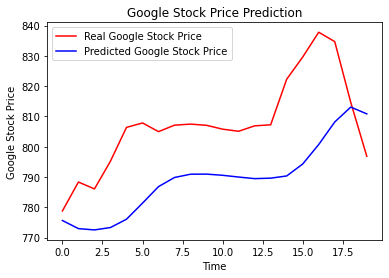

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()